<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module_24_PCA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 24: Principal Component Analysis (PCA)

This notebook is a **practice-only notebook** for students.

### Instructions for Students
- Complete every **TODO** step by step.
- Run the cells after completing each TODO.
- Focus on *why* you are doing each step, not just *how*.

### Dataset Used
We use the **Breast Cancer Wisconsin dataset**, which is:
- Numeric
- Medium dimensional (30 features)
- Very suitable for PCA
- Common in real ML pipelines



## 1) Imports (Given)


In [2]:
#Given for you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## 2) Load the Dataset (TODO)

TODO:
- Load the breast cancer dataset using sklearn
- Create:
  - X: feature DataFrame
  - y: target Series
- Print the shape of X and y


In [4]:
# TODO: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X.shape, y.shape

((569, 30), (569,))

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
X.describe().T[['mean','std','min','max']]

,mean,std,min,max
mean radius,14.127292,3.524049,6.981000,28.11000
mean texture,19.289649,4.301036,9.710000,39.28000
mean perimeter,91.969033,24.298981,43.790000,188.50000
mean area,654.889104,351.914129,143.500000,2501.00000
mean smoothness,0.096360,0.014064,0.052630,0.16340
mean compactness,0.104341,0.052813,0.019380,0.34540
mean concavity,0.088799,0.079720,0.000000,0.42680
mean concave points,0.048919,0.038803,0.000000,0.20120
mean symmetry,0.181162,0.027414,0.106000,0.30400
mean fractal dimension,0.062798,0.007060,0.049960,0.09744


In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



## 3) Inspect Feature Scales (TODO)


In [10]:
# TODO: Inspect feature statistics
X.describe().T[['mean','std','min','max']]

,mean,std,min,max
mean radius,14.127292,3.524049,6.981000,28.11000
mean texture,19.289649,4.301036,9.710000,39.28000
mean perimeter,91.969033,24.298981,43.790000,188.50000
mean area,654.889104,351.914129,143.500000,2501.00000
mean smoothness,0.096360,0.014064,0.052630,0.16340
mean compactness,0.104341,0.052813,0.019380,0.34540
mean concavity,0.088799,0.079720,0.000000,0.42680
mean concave points,0.048919,0.038803,0.000000,0.20120
mean symmetry,0.181162,0.027414,0.106000,0.30400
mean fractal dimension,0.062798,0.007060,0.049960,0.09744



## 4) Scale the Features (TODO)


In [11]:
# TODO: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+


## 5) Fit PCA Without Limiting Components (TODO)


In [13]:
# TODO: Fit full PCA and compute explained variance
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
cum_exaplained = np.cumsum(explained)
explained, cum_exaplained

(array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
        5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
        1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
        8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
        1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
        9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
        5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
        2.49601032e-05, 4.43482743e-06]),
 array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
        0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
        0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
        0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
        0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
        0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ]))


## 6) Explained Variance Plot (TODO)


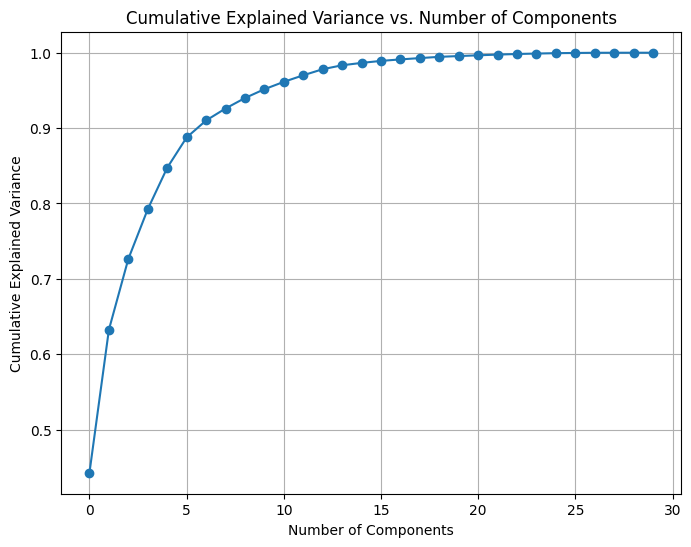

In [14]:
# TODO: Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cum_exaplained,marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()


## 7) Choose Number of Components (TODO)


In [15]:
# TODO: Find k90 and k95 and k97

def com_threshold(cum_varince,threashold):
  return int(np.argmax(cum_varince>=threashold))

k90 = com_threshold(cum_exaplained,0.9)
print(k90)
k95 = com_threshold(cum_exaplained,0.95)
print(k95)
k97 = com_threshold(cum_exaplained,0.97)
print(k97)

6
9
11



## 8) Apply PCA with Chosen Components (TODO)


In [16]:
# TODO: Apply PCA with selected number of components
k = k95
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(569, 9)


## 9) Inspect Principal Components (TODO)


In [18]:
# TODO: Inspect PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(k)]
)
loadings.head(9)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.218902,-0.233857,-0.008531,-0.041409,-0.037786,0.018741,-0.124088,-0.007452,-0.223110
1,0.103725,-0.059706,0.064550,0.603050,0.049469,-0.032179,0.011400,0.130675,0.112699
2,0.227537,-0.215181,-0.009314,-0.041983,-0.037375,0.017308,-0.114477,-0.018687,-0.223739
3,0.220995,-0.231077,0.028700,-0.053434,-0.010331,-0.001888,-0.051653,0.034674,-0.195586
4,0.142590,0.186113,-0.104292,-0.159383,0.365089,-0.286374,-0.140669,-0.288975,0.006425
5,0.239285,0.151892,-0.074092,-0.031795,-0.011704,-0.014131,0.030918,-0.151396,-0.167841
6,0.258400,0.060165,0.002734,-0.019123,-0.086375,-0.009344,-0.107520,-0.072827,0.040591
7,0.260854,-0.034768,-0.025564,-0.065336,0.043861,-0.052050,-0.150482,-0.152322,-0.111971
8,0.138167,0.190349,-0.040240,-0.067125,0.305941,0.356458,-0.093891,-0.231531,0.256040



## 10) Visualize Data Using First Two Principal Components (TODO)


In [ ]:
# TODO: 2D PCA visualization


## 11) PCA in a Model Pipeline (TODO)


In [ ]:
# TODO: Model comparison with and without PCA


## 12) Reflection Questions

Answer briefly in markdown:
1. Did PCA reduce the number of features significantly?
2. Did PCA improve, reduce, or maintain accuracy?
3. Would you use PCA for this dataset in a real project? Why or why not?
